In [1]:
import joblib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import numpy as np

import os
os.chdir('../src')

from specs import m_to_label, downstream_scores, layer_map
from plot_utils import make_correlation_plot, load_results

In [2]:
results_df = load_results('../from_scratch')

18it [02:23,  7.98s/it]


In [15]:
def get_layer_homogeneity(results_path, model, dataset='B2021'):
    rsa_path = Path(results_path, model, f'RSA_{dataset}.pkl')
    if rsa_path.exists():
        rsa_b2021 = joblib.load(rsa_path)
        n_layers = len(layer_map[model])
        distribution = np.zeros(n_layers)
        idxs, counts = np.unique(np.array(rsa_b2021['subjects_layer_selection']), return_counts=True)
        idxs = idxs.astype(int)
        distribution[idxs] = counts / np.sum(counts)
    
        return {'max_freq': np.max(distribution), 'unique': len(idxs)/n_layers}
    else:
        return None

dataset = 'B2021'
for model in layer_map:
    mf = get_layer_homogeneity('../rsa_corrected', model, dataset=dataset)
    if mf is not None:
        mff = mf['max_freq']
        un = mf['unique']
        rsa_val = results_df.loc[results_df['model'] == model][f'rsa_{dataset}_mean'].values[0]
        print(f'{model}: MaxFreq: {mff:.3f} - Unique: {un} - RSA: {rsa_val:.3f}')

mel256-ec-base: MaxFreq: 0.470 - Unique: 0.5 - RSA: 0.478
mel256-ec-base-as: MaxFreq: 0.998 - Unique: 0.2 - RSA: 0.481
mel256-ec-base-fma: MaxFreq: 0.742 - Unique: 0.2 - RSA: 0.450
mel256-ec-base-ll: MaxFreq: 0.904 - Unique: 0.4 - RSA: 0.388
mel256-ec-base_st-nopn: MaxFreq: 0.890 - Unique: 0.3 - RSA: 0.475
ec-ec-base: MaxFreq: 0.958 - Unique: 0.2 - RSA: 0.443
spec-ec-base: MaxFreq: 0.894 - Unique: 0.4 - RSA: 0.459
mel256-ec-small: MaxFreq: 0.542 - Unique: 0.6 - RSA: 0.447
mel256-ec-large: MaxFreq: 0.982 - Unique: 0.18181818181818182 - RSA: 0.508
mel256-ec-large_st-nopn: MaxFreq: 0.966 - Unique: 0.18181818181818182 - RSA: 0.473
BEATs_iter1: MaxFreq: 0.930 - Unique: 0.15384615384615385 - RSA: 0.455
BEATs_iter2: MaxFreq: 0.766 - Unique: 0.23076923076923078 - RSA: 0.465
BEATs_iter3: MaxFreq: 0.866 - Unique: 0.23076923076923078 - RSA: 0.460
BEATs_iter3_finetuned_on_AS2M_cpt1: MaxFreq: 0.912 - Unique: 0.23076923076923078 - RSA: 0.459
dasheng_base: MaxFreq: 0.268 - Unique: 0.4166666666666667 

In [4]:
results_df['rsa_B2021_mean']

0     0.387515
1     0.459264
2     0.446797
3     0.458503
4     0.477900
5     0.475202
6     0.455253
7     0.460439
8     0.449070
9     0.480780
10    0.428787
11    0.443222
12    0.465061
13    0.450107
14    0.507891
15    0.472715
16    0.444912
17    0.455001
Name: rsa_B2021_mean, dtype: float64

In [13]:
get_layer_homogeneity('../rsa_corrected', 'BEATs_iter1')

{'max_freq': 0.93}

<Axes: xlabel='Downstream performance', ylabel='RSA'>

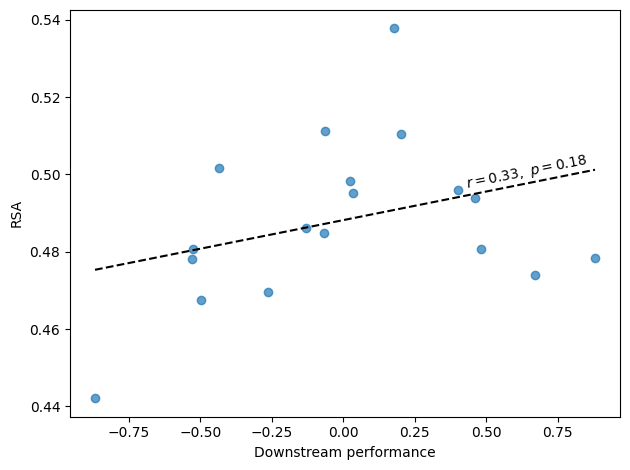

In [79]:
make_correlation_plot(results_df, 'DOWNSTREAM_global', 'rsa_NH2015_mean', 
                      offset_pixels=10,
                      xlabel='Downstream performance',
                      ylabel='RSA')

In [17]:
voxel_data.loc[voxel_data['subj_idx']==0]

,subj_idx,hemi,x_ras,y_ras,voxel_id,tonotopic,pitch,music,speech,any_roi,kell_r_reliability,pearson_r_reliability,voxel_variability_mean_reps,voxel_variability_std,coord_id,shared_by,roi_label_fname,roi_label_specific,roi_label_general,roi_anat_hemi
0,0,rh,42,-67,1251,0.0,0.0,0.0,0.0,0.0,0.301899,0.206085,0.005748,0.008757,42_-67,1.0,NaN,NaN,NaN,NaN
1,0,rh,48,-65,1347,0.0,0.0,0.0,0.0,0.0,0.358366,0.235360,0.003998,0.005629,48_-65,2.0,NaN,NaN,NaN,NaN
2,0,rh,42,-63,1437,0.0,0.0,0.0,0.0,0.0,0.336155,0.175659,0.004044,0.006359,42_-63,1.0,NaN,NaN,NaN,NaN
3,0,rh,50,-63,1441,0.0,0.0,0.0,0.0,0.0,0.407939,0.247605,0.003360,0.004235,50_-63,1.0,NaN,NaN,NaN,NaN
4,0,rh,52,-63,1442,0.0,0.0,0.0,0.0,0.0,0.473474,0.266499,0.002259,0.002847,52_-63,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,0,lh,43,58,11026,0.0,0.0,0.0,0.0,0.0,0.394190,0.361420,0.002392,0.002913,43_58,1.0,NaN,NaN,NaN,NaN
1149,0,lh,39,60,11112,0.0,0.0,0.0,0.0,0.0,0.404889,0.336089,0.003905,0.005283,39_60,1.0,NaN,NaN,NaN,NaN
1150,0,lh,41,60,11113,0.0,0.0,0.0,0.0,0.0,0.467691,0.371163,0.003679,0.004549,41_60,1.0,NaN,NaN,NaN,NaN
1151,0,lh,43,60,11114,0.0,0.0,0.0,0.0,0.0,0.452432,0.330493,0.002671,0.003201,43_60,1.0,NaN,NaN,NaN,NaN


In [17]:
downstream_perf[0]

['nsynth_pitch-v2.2',
 'tfds_gtzan-1.0',
 'tfds_crema_d-1.0',
 'speech_commands-v0.0',
 'fsd50k-v1',
 'esc50-v2.0']